In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [5]:
purchases = pd.read_csv('amazon_purchases.csv')
surveys = pd.read_csv('survey.csv')


In [6]:
surveys

,Survey ResponseID,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,R_1ou69fj4DQGsVcp,35 - 44 years,No,Black or African American,High school diploma or GED,"$25,000 - $49,999",Female,heterosexual (straight),Iowa,2,...,No,Yes,No,No,Lost a job,No,No,No,No,No
1,R_2UbJL30HRjK1sdD,45 - 54 years,No,White or Caucasian,High school diploma or GED,"$100,000 - $149,999",Male,heterosexual (straight),Ohio,2,...,No,No,No,No,NaN,No,No,No,No,Yes
2,R_UPXamGKtmf4RVIZ,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),Arkansas,1 (just me!),...,No,No,Yes,No,NaN,No,No,No,No,Yes
3,R_2dYk5auG9Fv5Qve,35 - 44 years,Yes,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...","$50,000 - $74,999",Male,heterosexual (straight),Tennessee,1 (just me!),...,No,No,No,No,NaN,No,No,No,No,No
4,R_2aP0GyIR66gSTiR,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$50,000 - $74,999",Male,heterosexual (straight),Virginia,2,...,No,Yes,No,No,NaN,No,Yes if consumers get part of the profit,I don't know,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,R_1JLBP1fFf3p8tpy,25 - 34 years,No,White or Caucasian,Bachelor's degree,"$50,000 - $74,999",Male,heterosexual (straight),North Carolina,2,...,Yes,Yes,No,No,NaN,No,No,No,No,Yes
5023,R_Odixb15Ykmxb0Dn,65 and older,No,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...","$100,000 - $149,999",Female,heterosexual (straight),Michigan,1 (just me!),...,No,No,No,No,NaN,No,No,No,No,Yes
5024,R_2uKaOXO8LfgoFf3,35 - 44 years,No,Black or African American,High school diploma or GED,"Less than $25,000",Male,LGBTQ+,Georgia,1 (just me!),...,No,No,No,No,NaN,No,No,I don't know,No,No
5025,R_2ZZSS68rfn9BMtt,45 - 54 years,No,White or Caucasian,Bachelor's degree,"Less than $25,000",Male,LGBTQ+,Arizona,1 (just me!),...,No,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes


Clean Purchases Dataset

In [7]:
purchases = purchases.dropna()
purchases.rename(columns={
    'ASIN/ISBN (Product Code)': 'ASIN/ISBN',
    'Shipping Address State': 'Purchase State'
}, inplace=True)

purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['Year'] = purchases['Order Date'].dt.year


purchases['Total Spending'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']

purchases

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00
5,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99
...,...,...,...,...,...,...,...,...,...,...
1850711,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75
1850712,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99
1850713,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99
1850714,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96


Customer Summary

In [8]:
customer_summary = pd.merge(purchases, surveys, on='Survey ResponseID', how='inner')

customer_summary

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
2,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
3,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
4,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675010,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675011,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675012,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675013,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes


Customer Behavior

In [9]:
customer_behavior = purchases.groupby('Survey ResponseID').agg({
    'Order Date': 'max',      
    'Total Spending': 'sum',        
    'ASIN/ISBN': 'count'
}).reset_index()

customer_behavior

,Survey ResponseID,Order Date,Total Spending,ASIN/ISBN
0,R_01vNIayewjIIKMF,2022-06-10,4231.86,118
1,R_037XK72IZBJyF69,2022-12-13,15894.58,1158
2,R_038ZU6kfQ5f89fH,2022-02-23,3074.47,33
3,R_03aEbghUILs9NxD,2023-01-25,3528.40,158
4,R_06RZP9pS7kONINr,2022-11-15,10424.85,411
...,...,...,...,...
4955,R_zd4E1BgAdaM2761,2022-12-27,12921.29,500
4956,R_zdLOP8JD2pe1brj,2023-02-24,6224.64,315
4957,R_zdQYFhfeqyBd2dH,2023-03-05,5914.46,244
4958,R_zfnsck2ZatnGtY5,2023-03-03,9837.88,570


In [10]:
customer_behavior = purchases.groupby('Survey ResponseID').agg({     
    'Total Spending': ['mean','sum'],           
    'ASIN/ISBN': 'count'
}).reset_index()

customer_behavior

Survey ResponseID Total Spending           ASIN/ISBN
                                  mean       sum     count
0     R_01vNIayewjIIKMF      35.863220   4231.86       118
1     R_037XK72IZBJyF69      13.725889  15894.58      1158
2     R_038ZU6kfQ5f89fH      93.165758   3074.47        33
3     R_03aEbghUILs9NxD      22.331646   3528.40       158
4     R_06RZP9pS7kONINr      25.364599  10424.85       411
...                 ...            ...       ...       ...
4955  R_zd4E1BgAdaM2761      25.842580  12921.29       500
4956  R_zdLOP8JD2pe1brj      19.760762   6224.64       315
4957  R_zdQYFhfeqyBd2dH      24.239590   5914.46       244
4958  R_zfnsck2ZatnGtY5      17.259439   9837.88       570
4959  R_zfqnsBzlOAKibzb      40.138438   2568.86        64

[4960 rows x 4 columns]

In [11]:
customer_behavior.columns = ['Survey ResponseID', 'mean_spending', 'total_spending', 'total_purchases']

In [12]:
customer_behavior

,Survey ResponseID,mean_spending,total_spending,total_purchases
0,R_01vNIayewjIIKMF,35.863220,4231.86,118
1,R_037XK72IZBJyF69,13.725889,15894.58,1158
2,R_038ZU6kfQ5f89fH,93.165758,3074.47,33
3,R_03aEbghUILs9NxD,22.331646,3528.40,158
4,R_06RZP9pS7kONINr,25.364599,10424.85,411
...,...,...,...,...
4955,R_zd4E1BgAdaM2761,25.842580,12921.29,500
4956,R_zdLOP8JD2pe1brj,19.760762,6224.64,315
4957,R_zdQYFhfeqyBd2dH,24.239590,5914.46,244
4958,R_zfnsck2ZatnGtY5,17.259439,9837.88,570


Trend of customer behavior

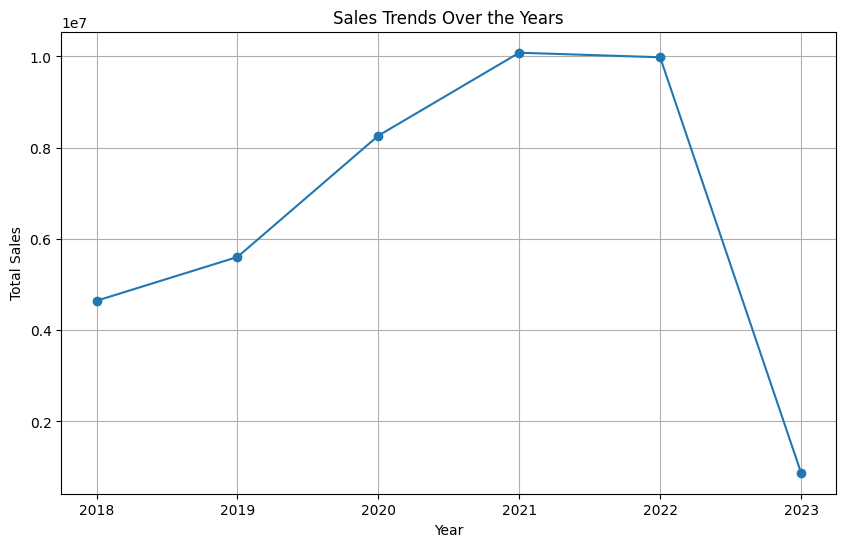

In [13]:
sales_by_year = purchases.groupby('Year')['Total Spending'].sum().reset_index()

# Create a line plot to show sales trends over the years.
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Total Spending'], marker='o')
plt.title("Sales Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

Spending of each state

In [14]:
state_spending = purchases.groupby('Purchase State', as_index=False)['Total Spending'].sum()
state_spending

,Purchase State,Total Spending
0,AK,45940.70
1,AL,418478.17
2,AR,316379.06
3,AZ,722643.15
4,CA,4105586.55
5,CO,692104.57
6,CT,396710.62
7,DC,156190.39
8,DE,198051.60
9,FL,2531409.82


Top 25%

In [15]:
threshold = state_spending['Total Spending'].quantile(0.75)
high_value_states = state_spending[state_spending['Total Spending'] >= threshold]

print(high_value_states)

   Purchase State  Total Spending
4              CA      4105586.55
9              FL      2531409.82
10             GA      1163964.94
14             IL      1636255.52
19             MA      1025238.34
22             MI      1329997.59
27             NC      1581511.86
34             NY      2238773.86
35             OH      1867317.33
38             PA      2087735.27
44             TX      3076774.65
46             VA      1127364.67
48             WA      1112854.57


Category preference by State

In [16]:
state_category_summary = purchases.groupby(['Purchase State', 'Category']).agg({
    'Total Spending': 'sum',
    'Quantity': 'sum',
    'ASIN/ISBN': 'count' 
}).reset_index().rename(columns={'ASIN/ISBN': 'OrderCount'})

state_category_summary

,Purchase State,Category,Total Spending,Quantity,OrderCount
0,AK,ABIS_BOOK,1353.92,100.0,99
1,AK,ABIS_LAWN_AND_GARDEN,91.19,7.0,2
2,AK,ABIS_MUSIC,37.67,2.0,2
3,AK,ABRASIVE_SHEETS,37.39,1.0,1
4,AK,ABRASIVE_WHEELS,10.99,1.0,1
...,...,...,...,...,...
61647,WY,WEIGH_SCALE,8.98,1.0,1
61648,WY,WIPER_BLADE,24.99,1.0,1
61649,WY,WIRELESS_AUDIO_ADAPTER,25.99,1.0,1
61650,WY,WRITING_BOARD,43.98,2.0,1


High value customers

In [17]:
customer_spending = customer_summary.groupby("Survey ResponseID", as_index=False)['Total Spending'].sum()

demographics = surveys[["Survey ResponseID", "Q-demos-age", "Q-demos-income", "Q-demos-state"]]
customer_spending = pd.merge(customer_spending, demographics, on="Survey ResponseID", how="left")

customer_spending

,Survey ResponseID,Total Spending,Q-demos-age,Q-demos-income,Q-demos-state
0,R_01vNIayewjIIKMF,4231.86,35 - 44 years,"$25,000 - $49,999",New Jersey
1,R_037XK72IZBJyF69,15894.58,55 - 64 years,"$25,000 - $49,999",Pennsylvania
2,R_038ZU6kfQ5f89fH,3074.47,25 - 34 years,"$25,000 - $49,999",California
3,R_03aEbghUILs9NxD,3528.40,35 - 44 years,"$50,000 - $74,999",Virginia
4,R_06RZP9pS7kONINr,10424.85,65 and older,"$75,000 - $99,999",South Dakota
...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,12921.29,25 - 34 years,"$150,000 or more",Illinois
4956,R_zdLOP8JD2pe1brj,6224.64,18 - 24 years,"$50,000 - $74,999",Wisconsin
4957,R_zdQYFhfeqyBd2dH,5914.46,25 - 34 years,"$25,000 - $49,999",Kansas
4958,R_zfnsck2ZatnGtY5,9837.88,25 - 34 years,"$75,000 - $99,999",Ohio


Top 25% customers

In [18]:
threshold = customer_spending['Total Spending'].quantile(0.75)
customer_spending['Value Segment'] = np.where(customer_spending['Total Spending'] >= threshold, "High Value", "Other")

print(customer_spending[customer_spending['Value Segment'] == "High Value"])
customer_spending

      Survey ResponseID  Total Spending    Q-demos-age       Q-demos-income  \
1     R_037XK72IZBJyF69        15894.58  55 - 64 years    $25,000 - $49,999   
12    R_0BCm9hRP9iTI081        27953.98  25 - 34 years  $100,000 - $149,999   
17    R_0DoXqOQl0hxEeFH        24926.51  35 - 44 years    $25,000 - $49,999   
20    R_0Hzrb8hEmXavTk5        20073.31  25 - 34 years     $150,000 or more   
24    R_0MwMIcbYO11SOwV        14891.02  45 - 54 years    $25,000 - $49,999   
...                 ...             ...            ...                  ...   
4935  R_z1mFB9Qp9HSTCIV        17435.55  45 - 54 years    $50,000 - $74,999   
4940  R_z6wrYNsvTbmmmQ1        11593.05  45 - 54 years    $25,000 - $49,999   
4948  R_zTf2i6s3E2OQZQR        11536.34  55 - 64 years    $25,000 - $49,999   
4950  R_zYlhkltqLl0WShX        12405.32  25 - 34 years    $75,000 - $99,999   
4955  R_zd4E1BgAdaM2761        12921.29  25 - 34 years     $150,000 or more   

     Q-demos-state Value Segment  
1     Pennsylvan

,Survey ResponseID,Total Spending,Q-demos-age,Q-demos-income,Q-demos-state,Value Segment
0,R_01vNIayewjIIKMF,4231.86,35 - 44 years,"$25,000 - $49,999",New Jersey,Other
1,R_037XK72IZBJyF69,15894.58,55 - 64 years,"$25,000 - $49,999",Pennsylvania,High Value
2,R_038ZU6kfQ5f89fH,3074.47,25 - 34 years,"$25,000 - $49,999",California,Other
3,R_03aEbghUILs9NxD,3528.40,35 - 44 years,"$50,000 - $74,999",Virginia,Other
4,R_06RZP9pS7kONINr,10424.85,65 and older,"$75,000 - $99,999",South Dakota,Other
...,...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,12921.29,25 - 34 years,"$150,000 or more",Illinois,High Value
4956,R_zdLOP8JD2pe1brj,6224.64,18 - 24 years,"$50,000 - $74,999",Wisconsin,Other
4957,R_zdQYFhfeqyBd2dH,5914.46,25 - 34 years,"$25,000 - $49,999",Kansas,Other
4958,R_zfnsck2ZatnGtY5,9837.88,25 - 34 years,"$75,000 - $99,999",Ohio,Other


Graph of respondent spending

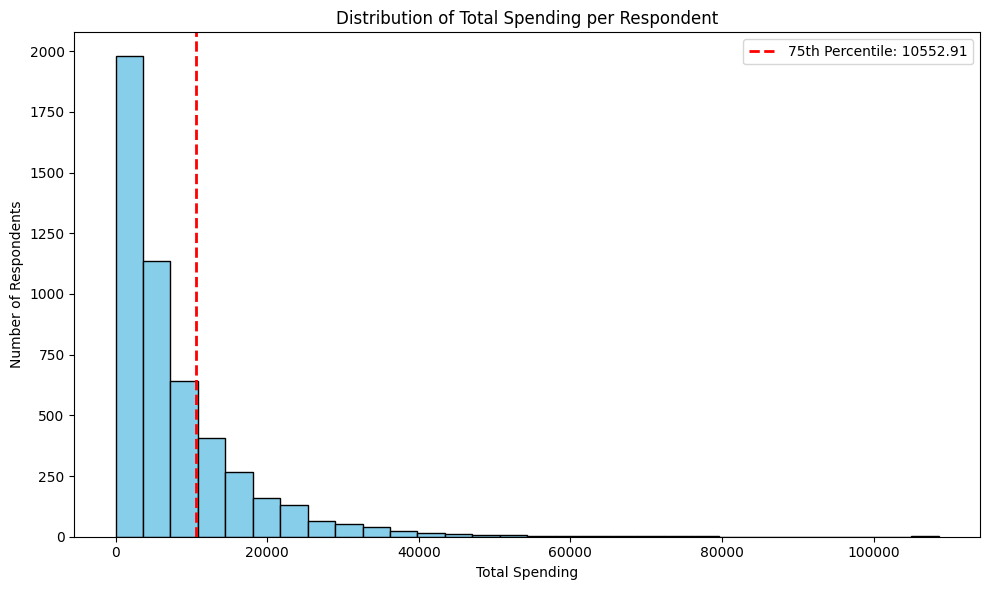

In [19]:
plt.figure(figsize=(10,6))
plt.hist(customer_spending['Total Spending'], bins=30, edgecolor='black', color='skyblue')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'75th Percentile: {threshold:.2f}')
plt.title("Distribution of Total Spending per Respondent")
plt.xlabel("Total Spending")
plt.ylabel("Number of Respondents")
plt.legend()
plt.tight_layout()
plt.show()

Demographics of respondents 

In [20]:

demo_product = customer_summary.groupby(["Q-demos-age", "Q-demos-state", "Q-demos-income", "Category"])\
                .agg({'Total Spending':'sum', 'ASIN/ISBN':'count'})\
                .reset_index().rename(columns={'ASIN/ISBN': 'OrderCount'})


demo_product

,Q-demos-age,Q-demos-state,Q-demos-income,Category,Total Spending,OrderCount
0,18 - 24 years,Alabama,"$100,000 - $149,999",ABIS_BOOK,55.46,1
1,18 - 24 years,Alabama,"$100,000 - $149,999",AMAZON_TABLET,34.99,1
2,18 - 24 years,Alabama,"$100,000 - $149,999",APPAREL,31.84,3
3,18 - 24 years,Alabama,"$100,000 - $149,999",APPAREL_GLOVES,27.48,3
4,18 - 24 years,Alabama,"$100,000 - $149,999",BACKPACK,27.99,1
...,...,...,...,...,...,...
393414,65 and older,Wisconsin,"Less than $25,000",WIG,13.29,1
393415,65 and older,Wisconsin,"Less than $25,000",WILDLIFE_FEEDER,29.95,1
393416,65 and older,Wisconsin,"Less than $25,000",WINDOW_FILM,72.97,3
393417,65 and older,Wisconsin,"Less than $25,000",WRITING_INSTRUMENT,7.98,1


age and category

In [21]:
age_category = customer_summary.groupby(["Q-demos-age", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()
age_category

,Q-demos-age,Category,TotalSpendingSum,OrderCount
0,18 - 24 years,3D_PRINTER,501.94,5
1,18 - 24 years,ABDOMINAL_EXERCISER,346.40,21
2,18 - 24 years,ABIS_BOOK,185689.15,10330
3,18 - 24 years,ABIS_DRUGSTORE,50.25,6
4,18 - 24 years,ABIS_DVD,555.51,32
...,...,...,...,...
9904,65 and older,WRITING_INSTRUMENT,1437.09,134
9905,65 and older,WRITING_PAPER,67.70,3
9906,65 and older,YARN,784.79,53
9907,65 and older,YO_YO,41.98,2


In [22]:
top_category_by_age = age_category.loc[age_category.groupby("Q-demos-age")["OrderCount"].idxmax()].reset_index(drop=True)
top_category_by_age

,Q-demos-age,Category,TotalSpendingSum,OrderCount
0,18 - 24 years,ABIS_BOOK,185689.15,10330
1,25 - 34 years,ABIS_BOOK,427737.06,25772
2,35 - 44 years,ABIS_BOOK,341234.88,25181
3,45 - 54 years,ABIS_BOOK,212040.64,14279
4,55 - 64 years,ABIS_BOOK,102750.42,6438
5,65 and older,ABIS_BOOK,39430.61,2738


graph

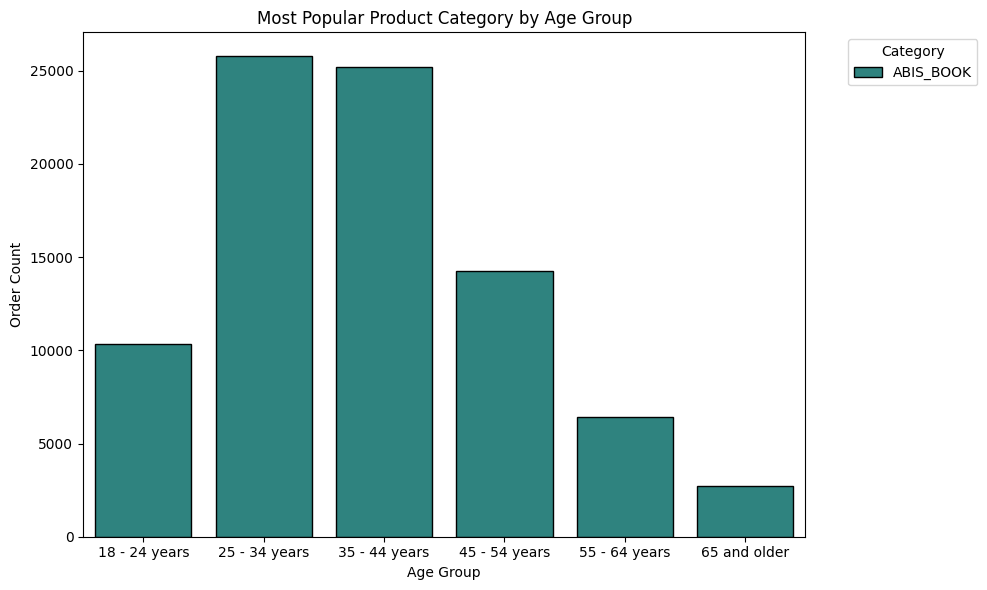

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_category_by_age, x="Q-demos-age", y="OrderCount", hue="Category", dodge=False, palette="viridis", edgecolor="black")
plt.title("Most Popular Product Category by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Order Count")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

state and category

In [24]:
state_category = customer_summary.groupby(["Q-demos-state", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()

state_category

,Q-demos-state,Category,TotalSpendingSum,OrderCount
0,Alabama,3D_PRINTER,39.99,1
1,Alabama,ABIS_BOOK,14817.37,940
2,Alabama,ABIS_DVD,301.62,17
3,Alabama,ABIS_ELECTRONICS,69.99,1
4,Alabama,ABIS_GIFT_CARD,195.00,9
...,...,...,...,...
61595,Wyoming,WEIGH_SCALE,8.98,1
61596,Wyoming,WIPER_BLADE,24.99,1
61597,Wyoming,WIRELESS_AUDIO_ADAPTER,25.99,1
61598,Wyoming,WRITING_BOARD,43.98,1


In [25]:
top_category_by_state = state_category.loc[state_category.groupby("Q-demos-state")["OrderCount"].idxmax()].reset_index(drop=True)
top_category_by_state

,Q-demos-state,Category,TotalSpendingSum,OrderCount
0,Alabama,ABIS_BOOK,14817.37,940
1,Alaska,ABIS_BOOK,1766.03,111
2,Arizona,ABIS_BOOK,23627.56,1620
3,Arkansas,ABIS_BOOK,14347.40,840
4,California,ABIS_BOOK,119721.80,7580
5,Colorado,ABIS_BOOK,26170.05,1553
6,Connecticut,ABIS_BOOK,14433.55,877
7,Delaware,ABIS_BOOK,4686.79,303
8,District of Columbia,PET_FOOD,8660.06,383
9,Florida,ABIS_BOOK,74047.33,4563


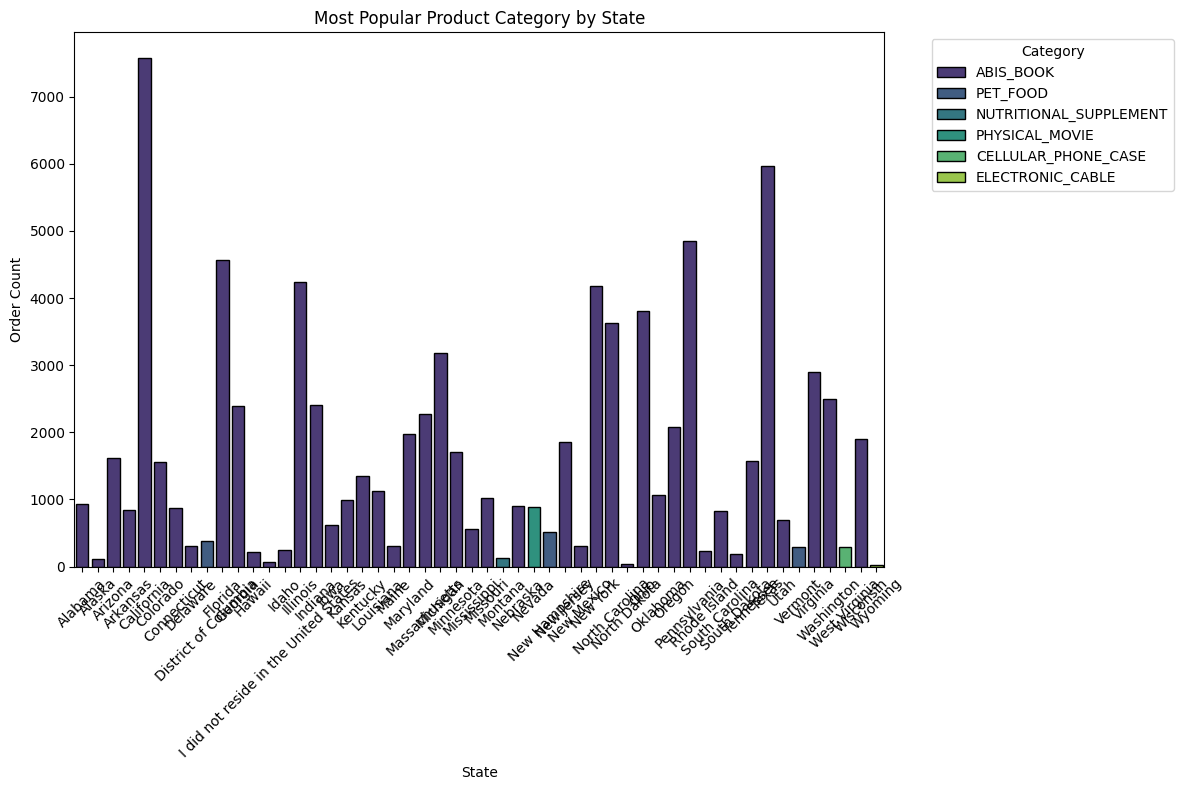

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_category_by_state, 
    x="Q-demos-state", 
    y="OrderCount", 
    hue="Category", 
    dodge=False, 
    palette="viridis",
    edgecolor="black"
)
plt.title("Most Popular Product Category by State")
plt.xlabel("State")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

popularity order for each state

In [27]:
combined_df = customer_summary.groupby(["Q-demos-state", "Category"], as_index=False).agg(OrderCount=('ASIN/ISBN', 'count'))
combined_df['Rank'] = combined_df.groupby('Q-demos-state')['OrderCount'].rank(method='min', ascending=False).astype(int)

combined_df = combined_df.sort_values(["Q-demos-state", "Rank"]).reset_index(drop=True)

combined_df

,Q-demos-state,Category,OrderCount,Rank
0,Alabama,ABIS_BOOK,940,1
1,Alabama,PET_FOOD,394,2
2,Alabama,SHIRT,342,3
3,Alabama,COFFEE,231,4
4,Alabama,TOY_FIGURE,229,5
...,...,...,...,...
61595,Wyoming,WATER_FLOTATION_DEVICE,1,136
61596,Wyoming,WEIGH_SCALE,1,136
61597,Wyoming,WIPER_BLADE,1,136
61598,Wyoming,WIRELESS_AUDIO_ADAPTER,1,136


In [28]:
specific_state = "Oregon"
state_ranking = combined_df[combined_df["Q-demos-state"] == specific_state]
state_ranking

,Q-demos-state,Category,OrderCount,Rank
45357,Oregon,ABIS_BOOK,2081,1
45358,Oregon,PET_FOOD,599,2
45359,Oregon,NUTRITIONAL_SUPPLEMENT,570,3
45360,Oregon,SHIRT,478,4
45361,Oregon,VEGETABLE,333,5
...,...,...,...,...
46784,Oregon,VIDEO_GAME_HARDWARE,1,1256
46785,Oregon,WATER_HEATER,1,1256
46786,Oregon,WEIGHT_PLATE,1,1256
46787,Oregon,WORKBENCH,1,1256


income bracket and category

In [29]:
income_category = customer_summary.groupby(["Q-demos-income", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()

income_category

,Q-demos-income,Category,TotalSpendingSum,OrderCount
0,"$100,000 - $149,999",3D_GLASSES,9.99,1
1,"$100,000 - $149,999",3D_PRINTER,8422.56,36
2,"$100,000 - $149,999",3D_PRINTING_PEN,59.99,1
3,"$100,000 - $149,999",ABDOMINAL_EXERCISER,964.45,32
4,"$100,000 - $149,999",ABIS_APPAREL,13.94,2
...,...,...,...,...
11311,Prefer not to say,WRITING_INSTRUMENT,1687.57,129
11312,Prefer not to say,WRITING_PAPER,56.82,6
11313,Prefer not to say,YARN,255.40,21
11314,Prefer not to say,YO_YO,12.99,1


In [30]:
top_category_by_income = income_category.loc[
    income_category.groupby("Q-demos-income")["OrderCount"].idxmax()
].reset_index(drop=True)

top_category_by_income

,Q-demos-income,Category,TotalSpendingSum,OrderCount
0,"$100,000 - $149,999",ABIS_BOOK,252391.52,17374
1,"$150,000 or more",ABIS_BOOK,204999.50,12820
2,"$25,000 - $49,999",ABIS_BOOK,232833.78,15268
3,"$50,000 - $74,999",ABIS_BOOK,262948.14,16422
4,"$75,000 - $99,999",ABIS_BOOK,212861.74,13996
5,"Less than $25,000",ABIS_BOOK,127906.58,7977
6,Prefer not to say,ABIS_BOOK,14941.50,881


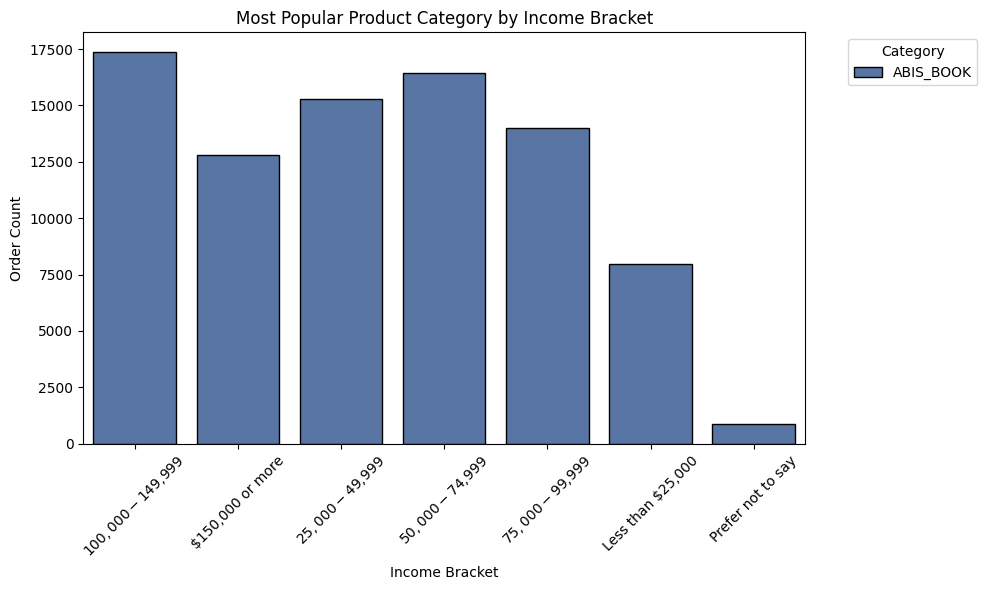

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_category_by_income,
            x="Q-demos-income",
            y="OrderCount",
            hue="Category",
            dodge=False,
            palette="deep",
            edgecolor="black")
plt.title("Most Popular Product Category by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## EDA by Income

In [81]:
customer_behavior

,Survey ResponseID,mean_spending,total_spending,total_purchases,most_purchases_labels,total_spendings_labels,mean_spendings_labels,Q-demos-age,Q-demos-income,Q-demos-state
0,R_01vNIayewjIIKMF,35.863220,4231.86,118,1 - 404,2 - 9550$,28 - 63$,35 - 44 years,"$25,000 - $49,999",New Jersey
1,R_037XK72IZBJyF69,13.725889,15894.58,1158,405 - 1167,9580 - 26745$,2 - 28$,55 - 64 years,"$25,000 - $49,999",Pennsylvania
2,R_038ZU6kfQ5f89fH,93.165758,3074.47,33,1 - 404,2 - 9550$,63 - 295$,25 - 34 years,"$25,000 - $49,999",California
3,R_03aEbghUILs9NxD,22.331646,3528.40,158,1 - 404,2 - 9550$,2 - 28$,35 - 44 years,"$50,000 - $74,999",Virginia
4,R_06RZP9pS7kONINr,25.364599,10424.85,411,405 - 1167,9580 - 26745$,2 - 28$,65 and older,"$75,000 - $99,999",South Dakota
...,...,...,...,...,...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,25.842580,12921.29,500,405 - 1167,9580 - 26745$,2 - 28$,25 - 34 years,"$150,000 or more",Illinois
4956,R_zdLOP8JD2pe1brj,19.760762,6224.64,315,1 - 404,2 - 9550$,2 - 28$,18 - 24 years,"$50,000 - $74,999",Wisconsin
4957,R_zdQYFhfeqyBd2dH,24.239590,5914.46,244,1 - 404,2 - 9550$,2 - 28$,25 - 34 years,"$25,000 - $49,999",Kansas
4958,R_zfnsck2ZatnGtY5,17.259439,9837.88,570,405 - 1167,9580 - 26745$,2 - 28$,25 - 34 years,"$75,000 - $99,999",Ohio


Text(0.5, 1.0, 'Total spendings by Age bracket')

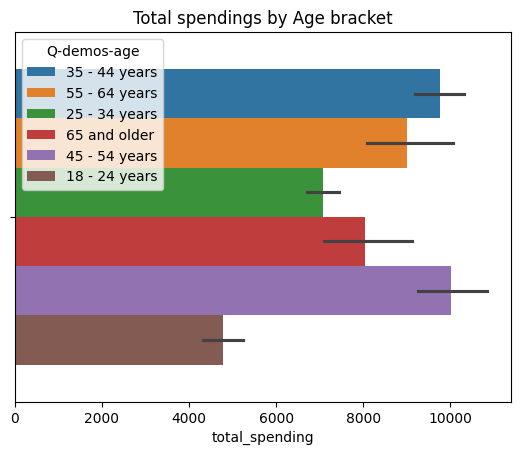

In [90]:
sns.barplot(customer_behavior, x='total_spending', hue='Q-demos-age')
plt.title('Total spendings by Age bracket')

Text(0.5, 1.0, 'Total spendings by Income bracket')

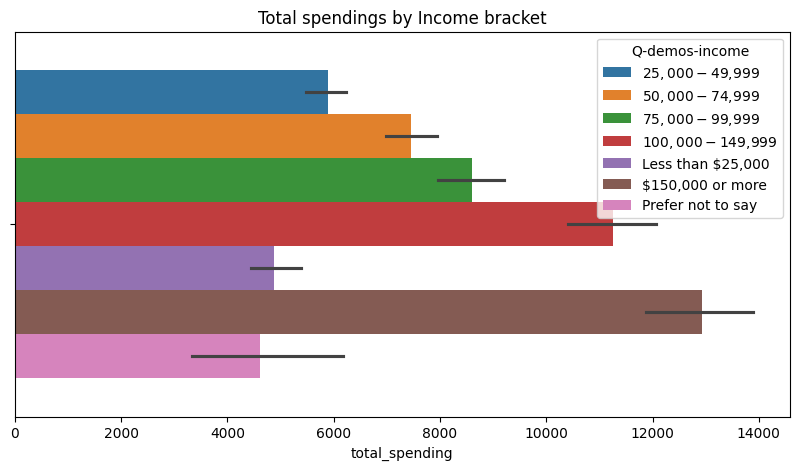

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(customer_behavior, x='total_spending', hue='Q-demos-income')
plt.title('Total spendings by Income bracket')

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(customer_behavior, x='total_spending', hue='Q-demos-income')
plt.title('Total spendings by Income bracket')

Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

## Customer Behavior based on value, income and age

In [33]:
customer_behavior = customer_behavior.set_index('Survey ResponseID')

# Most purchases

In [34]:
scaler = StandardScaler()
scaled_customer_behavior = scaler.fit_transform(pd.DataFrame(customer_behavior['total_purchases']))

ssd = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_customer_behavior)
    ssd.append(kmeans.inertia_)

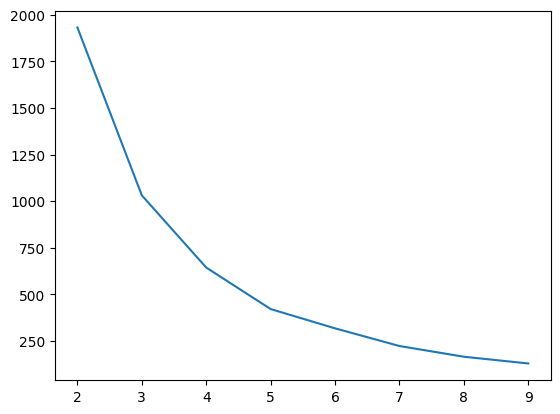

In [35]:
plt.plot(list(range(2,10)), ssd)

In [36]:
kmeans = KMeans(n_clusters=3, random_state=101) 
most_purchases_labels = kmeans.fit_predict(scaled_customer_behavior)

Text(0.5, 1.0, 'Clustering by total number of purchases')

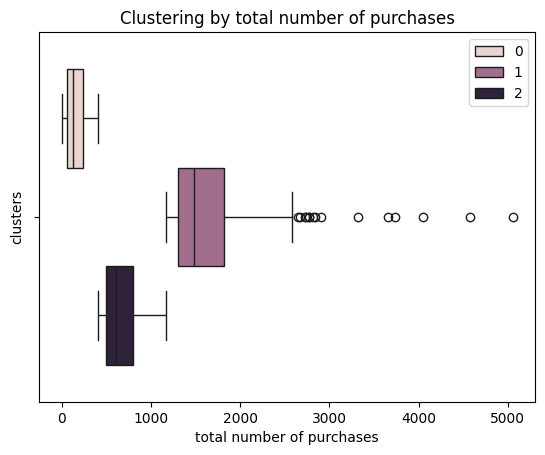

In [46]:
sns.boxplot(x=customer_behavior['total_purchases'], hue=most_purchases_labels)
plt.ylabel('clusters')
plt.xlabel('total number of purchases')
plt.title('Clustering by total number of purchases')

# Clustering based on Total spending

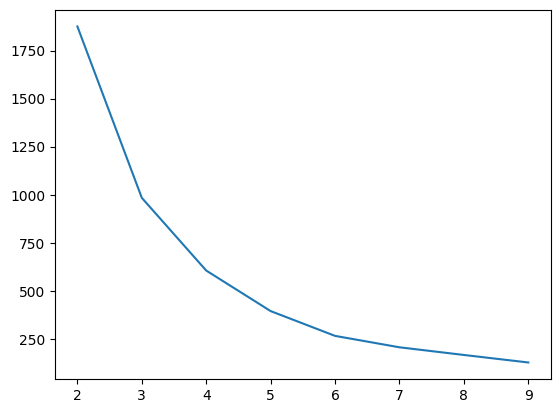

In [42]:
scaler = StandardScaler()
scaled_customer_behavior = scaler.fit_transform(pd.DataFrame(customer_behavior['total_spending']))

ssd = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_customer_behavior)
    ssd.append(kmeans.inertia_)
plt.plot(list(range(2,10)), ssd)

Text(0.5, 1.0, 'Clustering by total spendings')

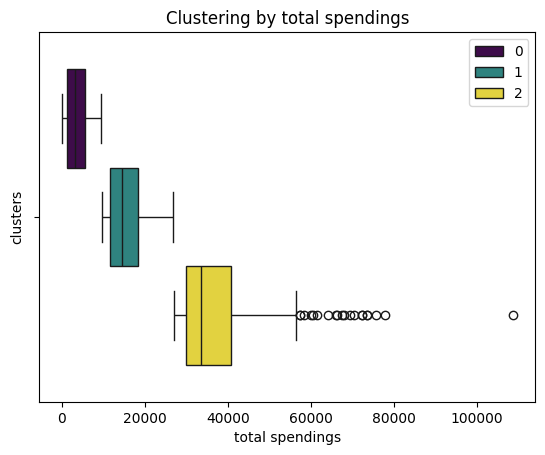

In [47]:
kmeans = KMeans(n_clusters=3, random_state=101) 
most_spending_labels = kmeans.fit_predict(scaled_customer_behavior)
sns.boxplot(x=customer_behavior['total_spending'], hue=most_spending_labels, palette='viridis')
plt.ylabel('clusters')
plt.xlabel('total spendings')
plt.title('Clustering by total spendings')

# Clustering based on mean spendings

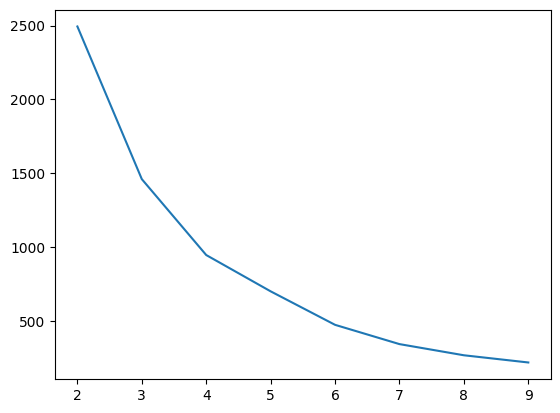

In [48]:
scaler = StandardScaler()
scaled_customer_behavior = scaler.fit_transform(pd.DataFrame(customer_behavior['mean_spending']))

ssd = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_customer_behavior)
    ssd.append(kmeans.inertia_)
plt.plot(list(range(2,10)), ssd)

Text(0.5, 1.0, 'Clustering by mean spendings')

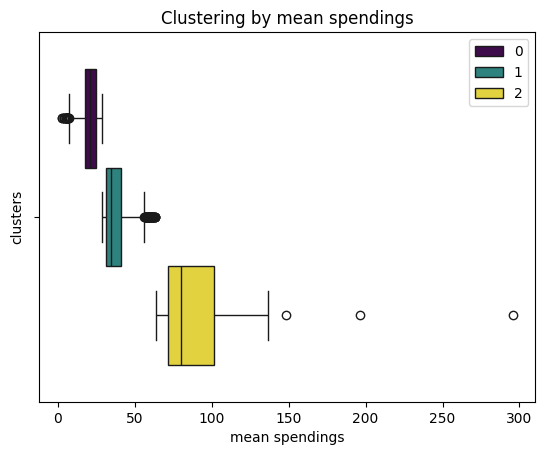

In [51]:
kmeans = KMeans(n_clusters=3, random_state=101) 
mean_spending_labels = kmeans.fit_predict(scaled_customer_behavior)
sns.boxplot(x=customer_behavior['mean_spending'], hue=mean_spending_labels, palette='viridis')
plt.ylabel('clusters')
plt.xlabel('mean spendings')
plt.title('Clustering by mean spendings')

In [52]:
customer_behavior.reset_index(inplace=True)

In [53]:
labels = pd.DataFrame({'most_purchases_labels': most_purchases_labels , 'total_spendings_labels' : most_spending_labels, 'mean_spendings_labels' : mean_spending_labels })

In [54]:
customer_behavior = pd.merge(customer_behavior, labels, left_index=True, right_index=True, how='left')

In [55]:
customer_behavior['most_purchases_labels'] = customer_behavior['most_purchases_labels'].astype(str)
total_purchases = customer_behavior[customer_behavior['most_purchases_labels'] == '0']['total_purchases']
customer_behavior.loc[customer_behavior['most_purchases_labels'] == '0', 'most_purchases_labels']  = f'{total_purchases.min()} - {total_purchases.max()}'

total_purchases = customer_behavior[customer_behavior['most_purchases_labels'] == '1']['total_purchases']
customer_behavior.loc[customer_behavior['most_purchases_labels'] == '1', 'most_purchases_labels']  = f'{total_purchases.min()} - {total_purchases.max()}'

total_purchases = customer_behavior[customer_behavior['most_purchases_labels'] == '2']['total_purchases']
customer_behavior.loc[customer_behavior['most_purchases_labels'] == '2', 'most_purchases_labels']  = f'{total_purchases.min()} - {total_purchases.max()}'

In [56]:
customer_behavior['total_spendings_labels'] = customer_behavior['total_spendings_labels'].astype(str)
total_purchases = customer_behavior[customer_behavior['total_spendings_labels'] == '0']['total_spending']
customer_behavior.loc[customer_behavior['total_spendings_labels'] == '0', 'total_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

total_purchases = customer_behavior[customer_behavior['total_spendings_labels'] == '1']['total_spending']
customer_behavior.loc[customer_behavior['total_spendings_labels'] == '1', 'total_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

total_purchases = customer_behavior[customer_behavior['total_spendings_labels'] == '2']['total_spending']
customer_behavior.loc[customer_behavior['total_spendings_labels'] == '2', 'total_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

In [57]:
customer_behavior['mean_spendings_labels'] = customer_behavior['mean_spendings_labels'].astype(str)
total_purchases = customer_behavior[customer_behavior['mean_spendings_labels'] == '0']['mean_spending']
customer_behavior.loc[customer_behavior['mean_spendings_labels'] == '0', 'mean_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

total_purchases = customer_behavior[customer_behavior['mean_spendings_labels'] == '1']['mean_spending']
customer_behavior.loc[customer_behavior['mean_spendings_labels'] == '1', 'mean_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

total_purchases = customer_behavior[customer_behavior['mean_spendings_labels'] == '2']['mean_spending']
customer_behavior.loc[customer_behavior['mean_spendings_labels'] == '2', 'mean_spendings_labels']  = f'{int(total_purchases.min())} - {int(total_purchases.max())}$'

In [58]:
customer_behavior

,Survey ResponseID,mean_spending,total_spending,total_purchases,most_purchases_labels,total_spendings_labels,mean_spendings_labels
0,R_01vNIayewjIIKMF,35.863220,4231.86,118,1 - 404,2 - 9550$,28 - 63$
1,R_037XK72IZBJyF69,13.725889,15894.58,1158,405 - 1167,9580 - 26745$,2 - 28$
2,R_038ZU6kfQ5f89fH,93.165758,3074.47,33,1 - 404,2 - 9550$,63 - 295$
3,R_03aEbghUILs9NxD,22.331646,3528.40,158,1 - 404,2 - 9550$,2 - 28$
4,R_06RZP9pS7kONINr,25.364599,10424.85,411,405 - 1167,9580 - 26745$,2 - 28$
...,...,...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,25.842580,12921.29,500,405 - 1167,9580 - 26745$,2 - 28$
4956,R_zdLOP8JD2pe1brj,19.760762,6224.64,315,1 - 404,2 - 9550$,2 - 28$
4957,R_zdQYFhfeqyBd2dH,24.239590,5914.46,244,1 - 404,2 - 9550$,2 - 28$
4958,R_zfnsck2ZatnGtY5,17.259439,9837.88,570,405 - 1167,9580 - 26745$,2 - 28$


In [59]:
customer_behavior = pd.merge(customer_behavior, surveys[['Survey ResponseID', 'Q-demos-age','Q-demos-income', 'Q-demos-state']], how='inner')

In [60]:
customer_behavior

,Survey ResponseID,mean_spending,total_spending,total_purchases,most_purchases_labels,total_spendings_labels,mean_spendings_labels,Q-demos-age,Q-demos-income,Q-demos-state
0,R_01vNIayewjIIKMF,35.863220,4231.86,118,1 - 404,2 - 9550$,28 - 63$,35 - 44 years,"$25,000 - $49,999",New Jersey
1,R_037XK72IZBJyF69,13.725889,15894.58,1158,405 - 1167,9580 - 26745$,2 - 28$,55 - 64 years,"$25,000 - $49,999",Pennsylvania
2,R_038ZU6kfQ5f89fH,93.165758,3074.47,33,1 - 404,2 - 9550$,63 - 295$,25 - 34 years,"$25,000 - $49,999",California
3,R_03aEbghUILs9NxD,22.331646,3528.40,158,1 - 404,2 - 9550$,2 - 28$,35 - 44 years,"$50,000 - $74,999",Virginia
4,R_06RZP9pS7kONINr,25.364599,10424.85,411,405 - 1167,9580 - 26745$,2 - 28$,65 and older,"$75,000 - $99,999",South Dakota
...,...,...,...,...,...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,25.842580,12921.29,500,405 - 1167,9580 - 26745$,2 - 28$,25 - 34 years,"$150,000 or more",Illinois
4956,R_zdLOP8JD2pe1brj,19.760762,6224.64,315,1 - 404,2 - 9550$,2 - 28$,18 - 24 years,"$50,000 - $74,999",Wisconsin
4957,R_zdQYFhfeqyBd2dH,24.239590,5914.46,244,1 - 404,2 - 9550$,2 - 28$,25 - 34 years,"$25,000 - $49,999",Kansas
4958,R_zfnsck2ZatnGtY5,17.259439,9837.88,570,405 - 1167,9580 - 26745$,2 - 28$,25 - 34 years,"$75,000 - $99,999",Ohio


**by age**

Text(0.5, 1.0, 'Cluster spread on the age brackets')

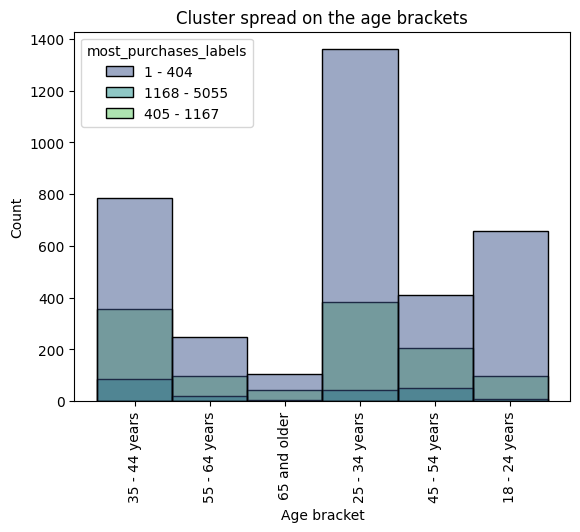

In [69]:
sns.histplot(customer_behavior.sort_values(by='most_purchases_labels'), x='Q-demos-age', hue='most_purchases_labels', palette='viridis')
plt.xticks(rotation=90);
plt.xlabel('Age bracket')
plt.title('Cluster spread on the age brackets')

1. Which age groups make the most purchases overall?


   Sol:The 25-34 years group has the highest count overall, followed by 35-44 years and 18-24 years.

3. How are the purchases distributed within each age group?

    1 - 404 (low)
    
    405 - 1167 (medium)
    
    1168 - 5055 (high)

    Sol: Most people fall into the low purchase range (1–404) across all age groups, especially in the younger and older age groups.

4. Which age group has the most high-volume purchasers?

    Sol: The 25–34 and 35–44 groups have more medium to high-volume purchasers compared to other age groups.

6. Are there any age groups with very few high-volume buyers?

   Sol: Yes, groups like 65 and older and 55–64 have relatively low participation in higher purchase brackets.

Text(0.5, 1.0, 'Cluster spread on the age brackets')

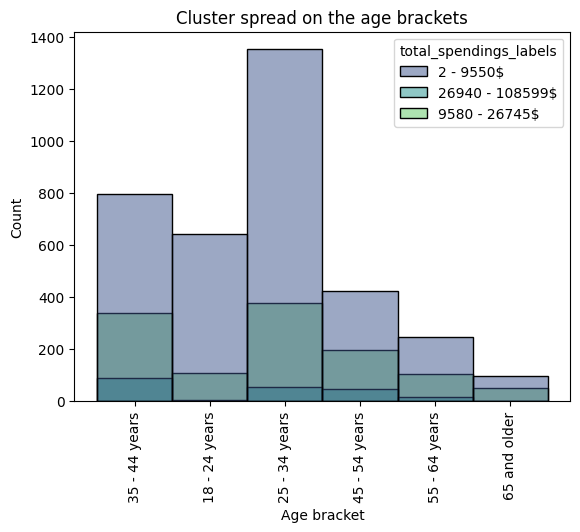

In [70]:
sns.histplot(customer_behavior.sort_values(by='total_spendings_labels'), x='Q-demos-age', hue='total_spendings_labels', palette='viridis')
plt.xticks(rotation=90);
plt.xlabel('Age bracket')
plt.title('Cluster spread on the age brackets')

1. Which age groups spend the most overall?
    Sol: The 25–34 years group again leads, with 35–44 years and 18–24 years following.

2. How is total spending distributed within each age group?

    2 – 9,550$ (low spenders)
    
    9,580 – 26,745$ (medium spenders)
    
    26,940 – 108,599$ (high spenders)
    
    Most people across all age groups fall into the low spending category. However, 25–34 and 35–44 have notable portions of medium and high spenders.

3. Which age group contains the most high spenders?
    The green section of each bar representing 26,940 – 108,599$ indicates high spenders.

    The 25–34 group has the most high spenders.
    
    The 35–44 group also contributes significantly.
    
    Very few high spenders exist in the 65 and older and 55–64 groups.

4. Are there age groups that tend to spend less overall?

    Sol: 65 and older and 55–64 years have both lower total participation and lower representation in higher spending brackets.

5. Does age influence both purchase count and total spending?
    Comparing this chart with the previous one:

    25–34 years consistently shows the highest activity in both purchases and total spending.
    
    Older age groups are less active both in purchase count and total spend.
    
    The 18–24 group makes a fair number of purchases but has fewer high spenders, suggesting lower-value purchases.

Text(0.5, 1.0, 'Cluster spread on the age brackets')

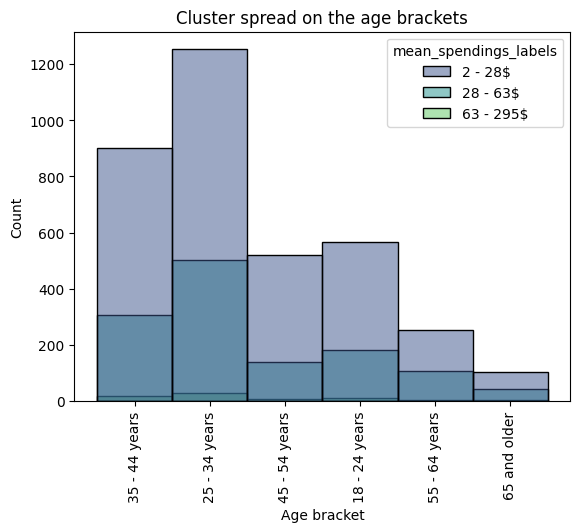

In [71]:
sns.histplot(customer_behavior.sort_values(by='mean_spendings_labels'), x='Q-demos-age', hue='mean_spendings_labels', palette='viridis')
plt.xticks(rotation=90);
plt.xlabel('Age bracket')
plt.title('Cluster spread on the age brackets')

1. Which age groups have the highest average spending per person?
    The 25–34 and 35–44 age groups show the highest concentration of medium to high average spenders.

2. Which age groups tend to spend the least on average?


   The 65 and older, 55–64, and 18–24 groups are predominantly in the low average spending range of 2–28$.


    This suggests their purchases may be more frequent but involve lower-value items?

4. Does high total spending correlate with high average spending?


   This graph shows that the 25–34 group likely buying often and spending significantly per purchase.

4. Are there any groups that spend frequently but not much per transaction?


   The 18–24 group had decent total purchases but shows mostly low average spending, suggesting frequent but small purchases.

6. Which group is most balanced across frequency and value?

    25–34 years stands out consistently across all three charts (most purchases, highest total spend, decent average spend).

    35–44 years follows closely in terms of average and total value, though with slightly fewer high-frequency purchasers than 25–34.

**By income** 

Text(0.5, 1.0, 'Cluster spread on the income brackets')

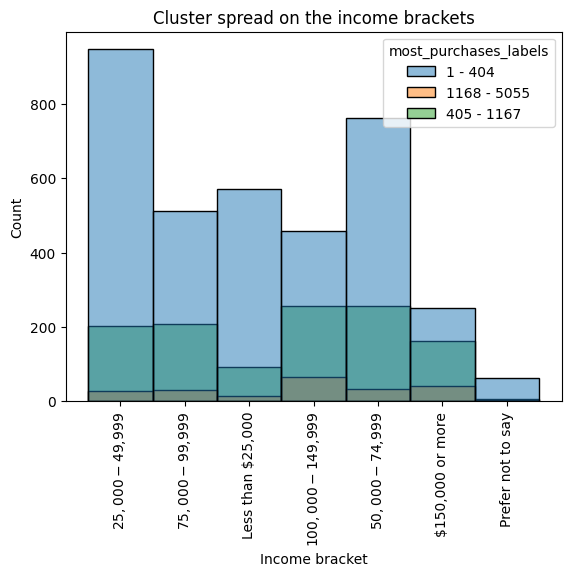

In [72]:
sns.histplot(customer_behavior.sort_values(by='most_purchases_labels'), x='Q-demos-income', hue='most_purchases_labels')
plt.xticks(rotation=90);
plt.xlabel('Income bracket')
plt.title('Cluster spread on the income brackets')

1. Which income groups have the highest purchase frequency?
    The 25,000–49,999 and 50,000–74,999 income groups show the highest concentration of medium to high purchase counts, suggesting these brackets are actively engaging in frequent purchasing.

2. Which income groups tend to purchase the least?
    The "Less than 25,000", "150,000 or more", and "Prefer not to say" groups are predominantly in the low purchase frequency range, indicating less overall activity.

3. Do higher-income groups spend more frequently?
    Surprisingly, the highest income group ($150,000 or more) doesn’t show a strong presence in the high purchase category. This suggests that high income doesn't always correlate with high purchase frequency — perhaps these individuals make fewer but more expensive purchases.

4. Which groups might be making frequent but lower-value purchases?
    The $25,000–49,999 group has a strong presence in the high-frequency, low-spending range. This could imply they’re making more routine or smaller-value transactions rather than large, infrequent ones.

Text(0.5, 1.0, 'Cluster spread on the income brackets')

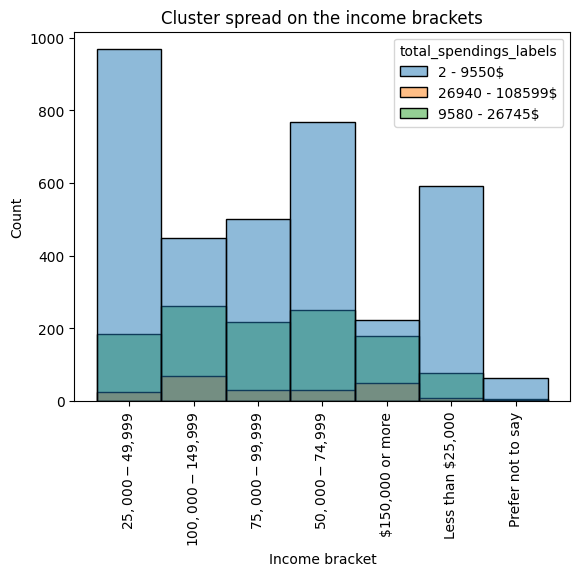

In [73]:
sns.histplot(customer_behavior.sort_values(by='total_spendings_labels'), x='Q-demos-income', hue='total_spendings_labels')
plt.xticks(rotation=90);
plt.xlabel('Income bracket')
plt.title('Cluster spread on the income brackets')

1. Which income groups have the highest total spending?

    The 100,000–149,999 income group shows the highest concentration of high total spenders (orange), followed closely by the 150,000 or more and $75,000–99,999 groups. This suggests that people in these brackets are likely making larger or more numerous purchases overall.

3. Which income groups tend to spend the least in total?

    The 25,000–49,999 and Less than $25,000 income groups are heavily concentrated in the lowest total spending tier (blue), pointing to limited overall spending power.

Text(0.5, 1.0, 'Cluster spread on the income brackets')

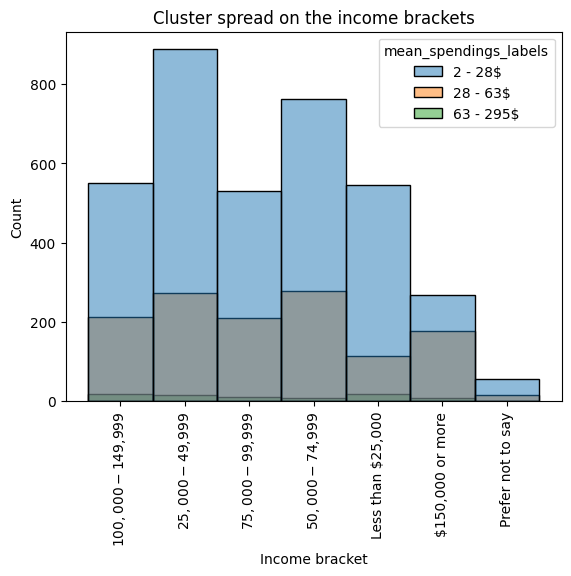

In [74]:
sns.histplot(customer_behavior.sort_values(by='mean_spendings_labels'), x='Q-demos-income', hue='mean_spendings_labels')
plt.xticks(rotation=90);
plt.xlabel('Income bracket')
plt.title('Cluster spread on the income brackets')

1. Which income groups have the highest average spending per transaction?
    The Lessa than 25,000, 100,000-149,999 and 25,000–49,999 groups show the clearest presence in the highest average spend tier ($63–295). These individuals tend to spend significantly per transaction, even if less frequently overall.

2. Which income groups tend to spend the least on average per transaction?
    The 25,000–49,999, and 50,000–74,999, Less than 25,000 groups are dominated by the lowest average spend range ($2–28). These groups may still make purchases often, but the individual transaction values are likely small.

**By State**

Text(0.5, 1.0, 'Cluster spread on the states based on most purchases')

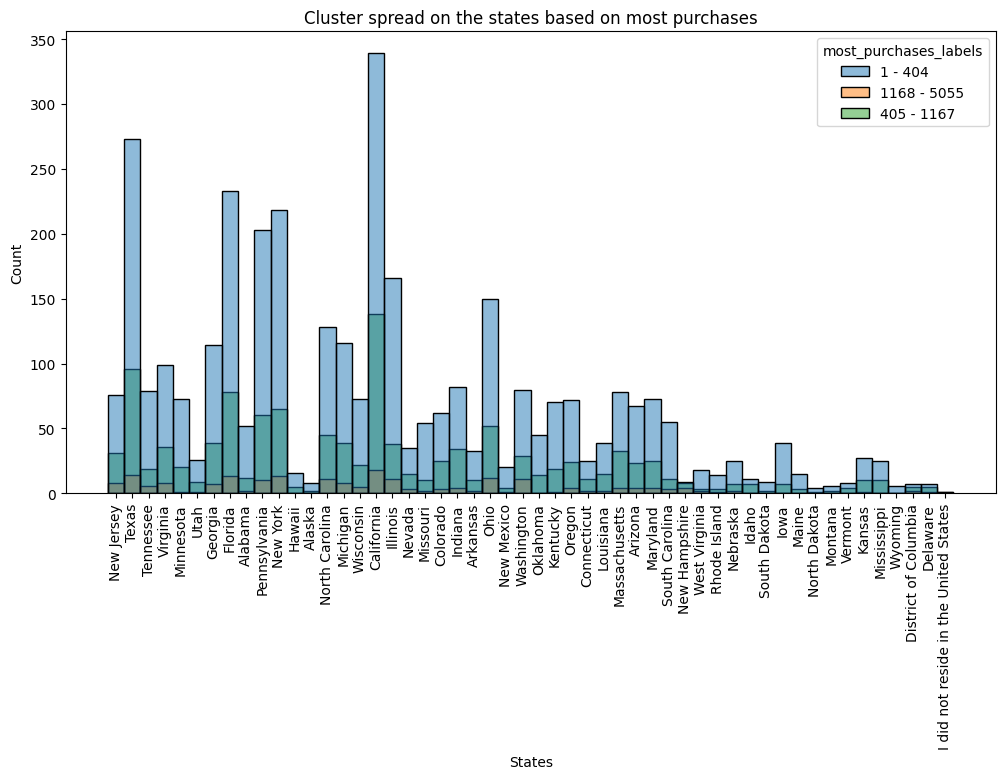

In [82]:
plt.figure(dpi=100, figsize=(12,6))
sns.histplot(customer_behavior.sort_values(by='most_purchases_labels'), x='Q-demos-state', hue='most_purchases_labels')
plt.xticks(rotation=90);
plt.xlabel('States')
plt.title('Cluster spread on the states based on most purchases')

1. Which states have the most of the highest purchase frequency per customer?
    Texas and Newyork followed by Illinois with purchase frequency of 1168 - 5055 per customer.

2. Which states have the most of the least purchase frequency overall?
    California followed by texas with purchase frequency of 1 - 404 per customer.

3. The highest of the middle tier purchase frequency: California

4.    lowest purchase frequency state: Montana

Text(0.5, 1.0, 'Cluster spread on the states based on total spendings')

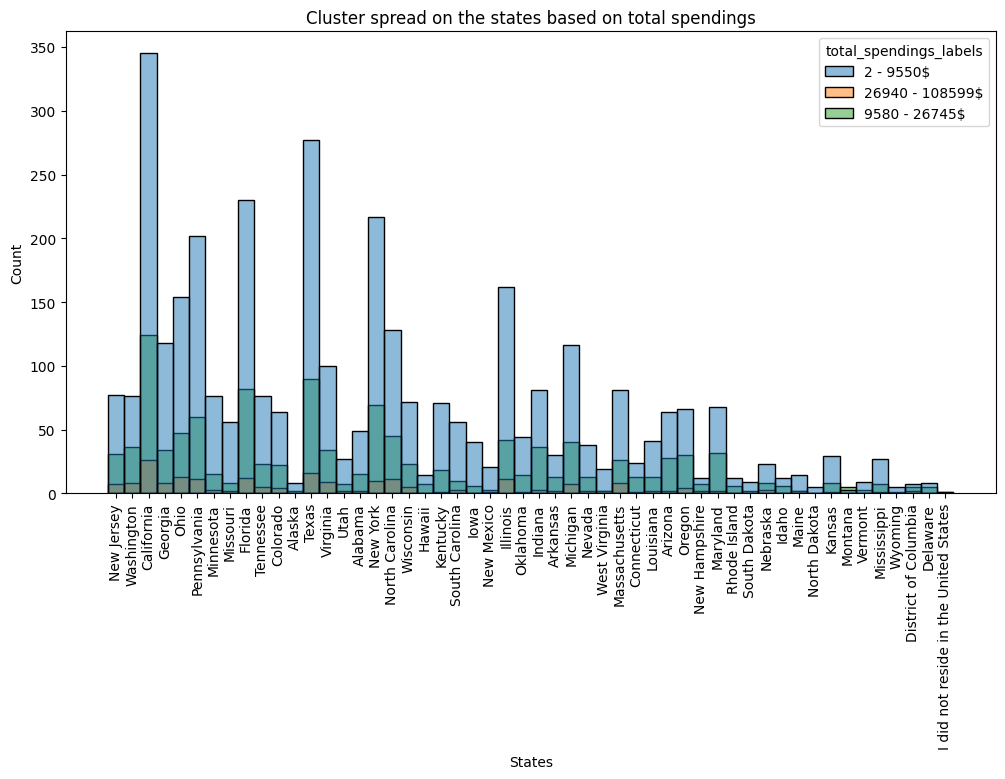

In [83]:
plt.figure(dpi=100, figsize=(12,6))
sns.histplot(customer_behavior.sort_values(by='total_spendings_labels'), x='Q-demos-state', hue='total_spendings_labels')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.title('Cluster spread on the states based on total spendings')

1. Which states have the most of the highest spending  per customer?
    California.

2. Which states have the most of the least purchase frequency overall?
    California.

3. The highest of the middle tier purchase frequency: California

4. lowest spending state: Montana

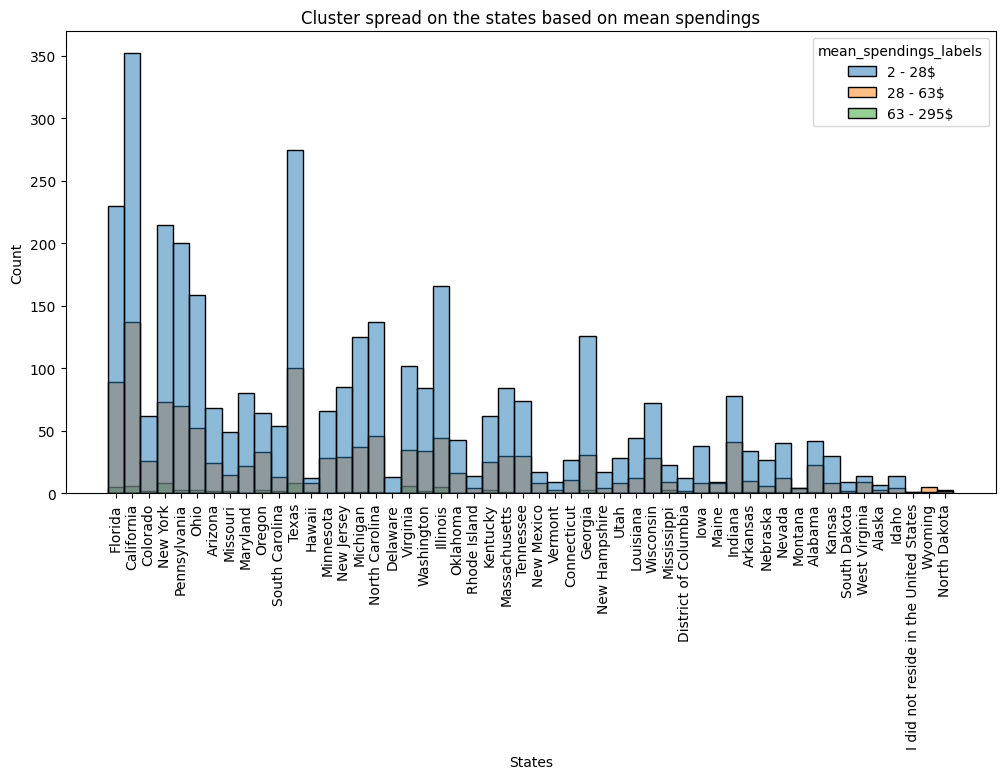

In [84]:
plt.figure(dpi=100, figsize=(12,6))
sns.histplot(customer_behavior.sort_values(by='mean_spendings_labels'), x='Q-demos-state', hue='mean_spendings_labels')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.title('Cluster spread on the states based on mean spendings');

1. Which states have the most of the highest spending  per customer?
    Texas, New york.

2. Which states have the most of the least purchase frequency overall?
    California.

3. The highest of the middle tier purchase frequency: California

4. lowest spending state: Montana

Clustering for Income and Total Spending

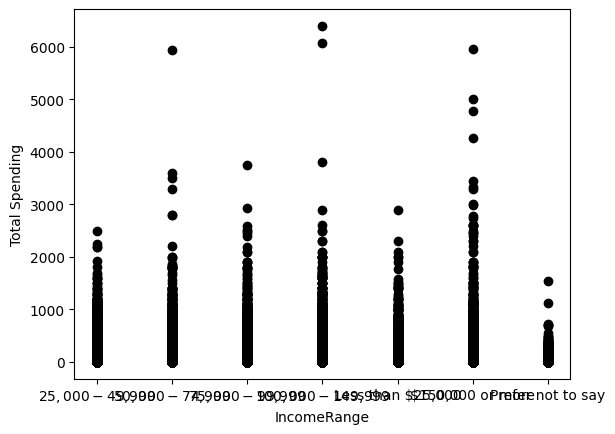

In [151]:
X = customer_summary[["Total Spending", "Q-demos-income"]]
plt.scatter(X["Q-demos-income"],X["Total Spending"],c='black')
plt.xlabel('IncomeRange')
plt.ylabel('Total Spending')
plt.show()


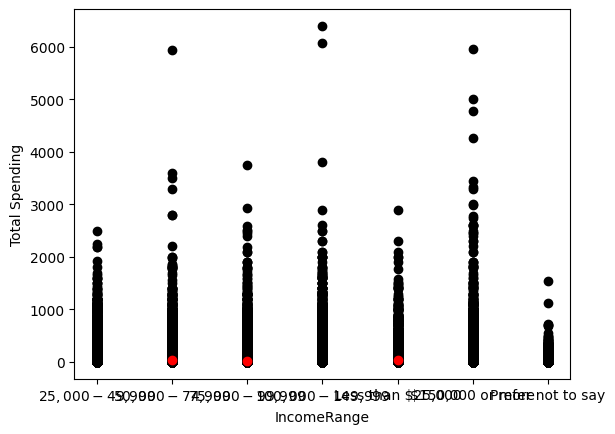

In [161]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Q-demos-income"],X["Total Spending"],c='black')
plt.scatter(Centroids["Q-demos-income"],Centroids["Total Spending"],c='red')
plt.xlabel('IncomeRange')
plt.ylabel('Total Spending')
plt.show()

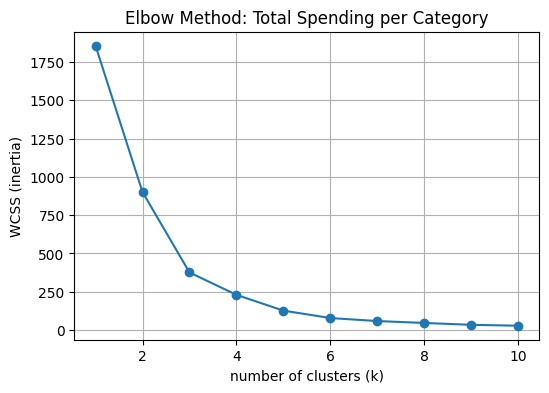

                      Category  Total Spending  Cluster
0                   3D_GLASSES            9.99        0
1                   3D_PRINTER        30412.67        5
2              3D_PRINTING_PEN          339.58        0
3          ABDOMINAL_EXERCISER         4961.99        0
4                 ABIS_APPAREL           25.25        0
...                        ...             ...      ...
1851  Wireless Phone Accessory           32.83        0
1852                      YARN        16798.50        0
1853                     YO_YO          963.58        0
1854               ZENER_DIODE            7.49        0
1855           ZIPPER_FASTENER         1690.09        0

[1856 rows x 3 columns]


<Axes: ylabel='Cluster'>

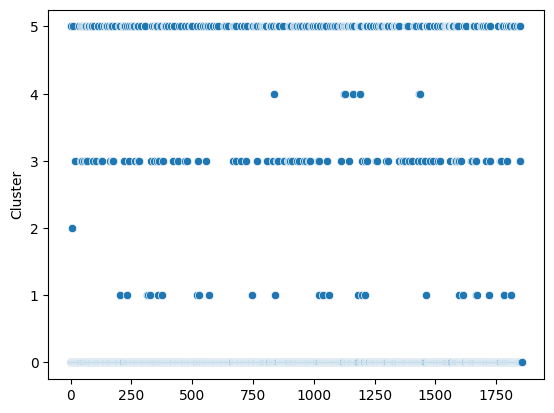

In [176]:
cat_sales = (
    customer_summary
    .groupby('Category', as_index=False)['Total Spending']
    .sum()
)

# Scale the spending values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cat_sales[['Total Spending']])

# Elbow Method to pick k
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method: Total Spending per Category')
plt.xlabel('number of clusters (k)')
plt.ylabel('WCSS (inertia)')
plt.grid(True)
plt.show()

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
cat_sales['Cluster'] = kmeans.fit_predict(X_scaled)

# cluster centers

print(cat_sales[['Category','Total Spending','Cluster']])
sns.scatterplot(cat_sales['Cluster'])

Cluster centers (TotalS pending): [15450.14817642  3643.95487935 38025.4218894 ]


,Survey ResponseID,Total Spending,SpenderCluster
0,R_01vNIayewjIIKMF,4231.86,1
1,R_037XK72IZBJyF69,15894.58,0
2,R_038ZU6kfQ5f89fH,3074.47,1
3,R_03aEbghUILs9NxD,3528.40,1
4,R_06RZP9pS7kONINr,10424.85,0


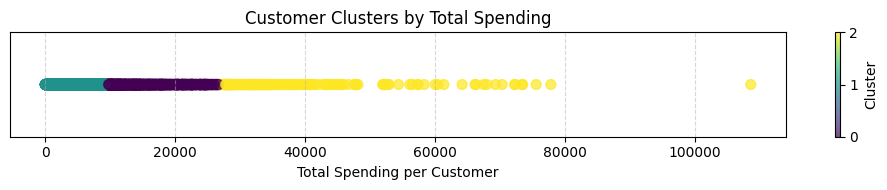

In [169]:
cust_spending = customer_summary.groupby('Survey ResponseID', as_index=False)['Total Spending'].sum()

# 5) Scale the spending values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cust_spending[['Total Spending']])

# 6) Fit K-Means to cluster customers by spending
kmeans = KMeans(n_clusters=3, random_state=42)
cust_spending['SpenderCluster'] = kmeans.fit_predict(X_scaled)

# 7) Inspect cluster centers in original dollars
centers = scaler.inverse_transform(kmeans.cluster_centers_).flatten()
print("Cluster centers (TotalS pending):", centers)

# 8) Display the first few customers with their cluster label
display(cust_spending.head())

# 9) Plot the clusters on a 1-D axis
plt.figure(figsize=(10,2))
plt.scatter(
    cust_spending['Total Spending'],
    [0]*len(cust_spending),
    c=cust_spending['SpenderCluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.yticks([])
plt.xlabel('Total Spending per Customer')
plt.title('Customer Clusters by Total Spending')
plt.colorbar(label='Cluster')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 2) Merge cluster labels back onto the survey demographics
cust_demo = pd.merge(
    cust_spending,
    surveys[['Survey ResponseID','Q-demos-age','Q-demos-income']],
    on='Survey ResponseID',
    how='left'
)

# 3) Compute counts of each income bracket within each cluster
income_dist = (
    cust_demo
    .groupby(['SpenderCluster','Q-demos-income'])
    .size()
    .reset_index(name='Count')
)

# 4) For each cluster, pick the bracket with the highest count
income_top = (
    income_dist
    .loc[income_dist.groupby('SpenderCluster')['Count'].idxmax()]
    .rename(columns={'Q-demos-income':'TopIncomeBracket'})
    .reset_index(drop=True)
)

# 5) Repeat for age ranges
age_dist = (
    cust_demo
    .groupby(['SpenderCluster','Q-demos-age'])
    .size()
    .reset_index(name='Count')
)

age_top = (
    age_dist
    .loc[age_dist.groupby('SpenderCluster')['Count'].idxmax()]
    .rename(columns={'Q-demos-age':'TopAgeRange'})
    .reset_index(drop=True)
)

# one summary table
cluster_categories = pd.merge(
    income_top[['SpenderCluster','TopIncomeBracket']],
    age_top[['SpenderCluster','TopAgeRange']],
    on='SpenderCluster'
)

print(cluster_categories)


   SpenderCluster     TopIncomeBracket    TopAgeRange
0               0  $100,000 - $149,999  25 - 34 years
1               1    $25,000 - $49,999  25 - 34 years
2               2  $100,000 - $149,999  35 - 44 years


In [171]:
income_wide = income_dist.pivot(index='SpenderCluster',
                                columns='Q-demos-income',
                                values='Count').fillna(0).astype(int)
age_wide    = age_dist.pivot(index='SpenderCluster',
                             columns='Q-demos-age',
                             values='Count').fillna(0).astype(int)

print("Income distribution by cluster (wide):")
display(income_wide)

print("Age distribution by cluster (wide):")
display(age_wide)

Income distribution by cluster (wide):


Q-demos-income,"$100,000 - $149,999","$150,000 or more","$25,000 - $49,999","$50,000 - $74,999","$75,000 - $99,999","Less than $25,000",Prefer not to say
SpenderCluster,,,,,,,
0,264,177,185,252,219,77,6
1,447,223,968,767,501,592,64
2,69,52,25,31,31,8,2


Age distribution by cluster (wide):


Q-demos-age,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,65 and older
SpenderCluster,,,,,,
0,110,378,340,198,103,51
1,645,1354,798,421,247,97
2,6,55,89,49,17,2


In [173]:
import pandas as pd

# 1) Merge cluster labels with the survey demographics
cust_demo = pd.merge(
    cust_spending,
    surveys[['Survey ResponseID','Q-demos-age','Q-demos-income']],
    on='Survey ResponseID',
    how='left'
)

# 2) Full distribution of income brackets by cluster
income_dist = (
    cust_demo
    .groupby(['SpenderCluster','Q-demos-income'])
    .size()
    .reset_index(name='Count')
)

print("Income bracket counts per cluster:")
print(income_dist.to_string(index=False))

# 3) Full distribution of age ranges by cluster
age_dist = (
    cust_demo
    .groupby(['SpenderCluster','Q-demos-age'])
    .size()
    .reset_index(name='Count')
)

print("\nAge range counts per cluster:")
print(age_dist.to_string(index=False))


Income bracket counts per cluster:
 SpenderCluster      Q-demos-income  Count
              0 $100,000 - $149,999    264
              0    $150,000 or more    177
              0   $25,000 - $49,999    185
              0   $50,000 - $74,999    252
              0   $75,000 - $99,999    219
              0   Less than $25,000     77
              0   Prefer not to say      6
              1 $100,000 - $149,999    447
              1    $150,000 or more    223
              1   $25,000 - $49,999    968
              1   $50,000 - $74,999    767
              1   $75,000 - $99,999    501
              1   Less than $25,000    592
              1   Prefer not to say     64
              2 $100,000 - $149,999     69
              2    $150,000 or more     52
              2   $25,000 - $49,999     25
              2   $50,000 - $74,999     31
              2   $75,000 - $99,999     31
              2   Less than $25,000      8
              2   Prefer not to say      2

Age range counts p

In [178]:
cat_sales[cat_sales['Cluster'] == 0].sort_values(by='Total Spending')

,Category,Total Spending,Cluster
1337,RELISH,2.49,0
1117,NONACTIVATED_GIFT_CARD,2.99,0
1243,PODCAST_EPISODIC_AUDIO_BROADCAST,4.80,0
881,Hardcover,5.83,0
984,LIGHT_EMITTING_DIODE,5.92,0
...,...,...,...
1390,SCIENCE_FUNDAMENTALS_KIT,21583.19,0
967,LAUNDRY_HAMPER,21606.47,0
689,FOOD_MIXER,21627.94,0
601,EXERCISE_BAND,21628.42,0


In [179]:
cat_sales[cat_sales['Cluster'] == 1].sort_values(by='Total Spending')

,Category,Total Spending,Cluster
1719,VACUUM_CLEANER,169757.84,1
1181,PERSONAL_COMPUTER,172484.54,1
1810,WEARABLE_COMPUTER,173019.05,1
232,BOOT,178847.11,1
527,DRINK_FLAVORED,179806.18,1
1781,VITAMIN,184163.91,1
202,BLANKET,187669.64,1
747,GIFT_CARD,192799.74,1
1199,PET_SUPPLIES,195464.87,1
1462,SKIN_MOISTURIZER,204286.33,1


<Axes: xlabel='Total Spending', ylabel='Total Spending'>

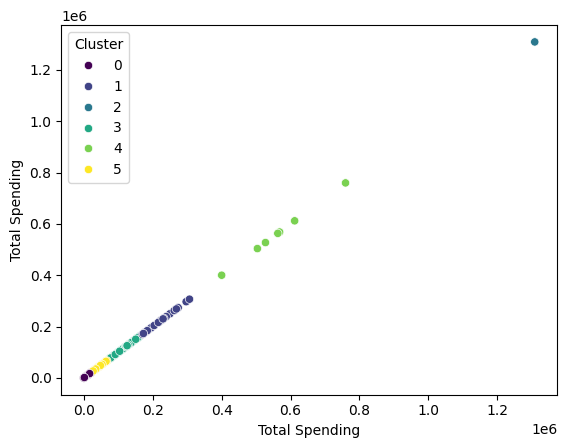

In [181]:
sns.scatterplot(cat_sales, x='Total Spending', y='Total Spending', hue='Cluster', palette='viridis')